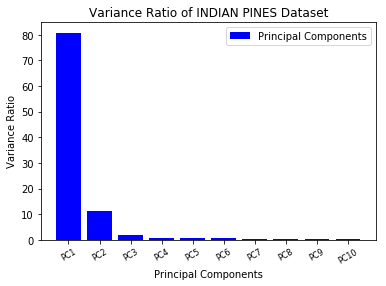

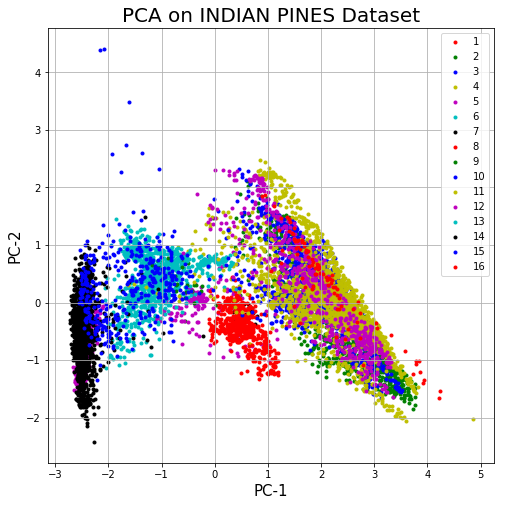

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import decomposition
from sklearn import datasets

# load dataset into Pandas DataFrame
df = pd.read_csv(r"C:\Users\slowg\Desktop\Datasetm\Complete_Data.csv")

from sklearn.preprocessing import StandardScaler
n=[]
ind=[]
for i in range(200):
    n.append(i+1)
for i in range(200):
    ind.append('px'+str(n[i]))

features = ind
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
from sklearn.preprocessing import MinMaxScaler
scaler_model = MinMaxScaler()
scaler_model.fit(x.astype(float))
x=scaler_model.transform(x)


from sklearn.decomposition import PCA


## Finding the principle components
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
ev=pca.explained_variance_ratio_

# *Since the initial 2 principal components have high variance.
#   so, we select pc-1 and pc-2.
#---------------------------------------------------
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC-1','PC-2'])
# Adding lables
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

#--------- Bar Graph for Explained Variance Ratio ------------
plt.bar([1,2,3,4,5,6,7,8,9,10],list(ev*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
pc=[]
for i in range(10):
    pc.append('PC'+str(i+1))
#plt.xticks([1,2,3,4,5,6,7,8,9,10],pc, fontsize=8, rotation=30)
plt.xticks([1,2,3,4,5,6,7,8,9,10],pc, fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of INDIAN PINES Dataset')
plt.show()


#---------------------------------------------------
# Plotting pc1 & pc2
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('PCA on INDIAN PINES Dataset', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
colors = ['r','g','b','y','m','c','k','r','g','b','y','m','c','k','b','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 9)
ax.legend(targets)
ax.grid()
plt.show() # FOR SHOWING THE PLOT

#-------------------SENDING REDUCED DATA INTO CSV FILE------------

finalDf.to_csv('indian_pines_after_pca.dat')



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import decomposition
from sklearn import datasets

# load dataset into Pandas DataFrame
df = pd.read_csv(r"C:\Users\slowg\Desktop\Datasetm\Complete_Data.csv")

from sklearn.preprocessing import StandardScaler
n=[]
ind=[]
for i in range(200):
    n.append(i+1)
for i in range(200):
    ind.append('px'+str(n[i]))

features = ind
X = df.loc[:, features].values
# Separating out the target
Y = df.loc[:,['target']].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, Y, test_size = 0.3, random_state = 100)
y_train=y_train.ravel()
y_test=y_test.ravel()
#classifier.fit(X_train, y_train.squeeze())

from sklearn.neighbors import KNeighborsClassifier  # FOR K=13 ,IT HAS ACCURACY AROUND 72.7488902980
from sklearn import metrics
import time
#model = KNeighborsClassifier()
model=KNeighborsClassifier(n_neighbors =13, weights='uniform', algorithm='auto')
model.fit(X_train, y_train)
start = time.time()
Yhat = model.predict(X_test)
end = time.time()
print('Time Taken For Classification is :',(end - start))
print("Accuracy :",metrics.accuracy_score(Yhat, y_test)*100)
print('\n','*'*11,'Accuracy of INDIAN-PINES Dataset Before PCA','*'*11)
print('*'*11,' Classifier : K-NEAREST NEIGHBOUR ','*'*11)
for K in range(25):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_test)
 print ("Accuracy is :%1.10f"%(metrics.accuracy_score(y_test,y_pred)*100),"% ","for K-Value: %4d"%(K_value))



Time Taken For Classification is : 3.803860902786255
Accuracy : 72.74889029803424

 *********** Accuracy of INDIAN-PINES Dataset Before PCA ***********
***********  Classifier : K-NEAREST NEIGHBOUR  ***********
Accuracy is :68.4686112873 %  for K-Value:    1
Accuracy is :69.6100190235 %  for K-Value:    2
Accuracy is :71.2270133164 %  for K-Value:    3
Accuracy is :71.4013950539 %  for K-Value:    4
Accuracy is :71.6550412175 %  for K-Value:    5
Accuracy is :72.1781864299 %  for K-Value:    6
Accuracy is :72.0513633481 %  for K-Value:    7
Accuracy is :72.0038046925 %  for K-Value:    8
Accuracy is :72.4318325935 %  for K-Value:    9
Accuracy is :72.5428027901 %  for K-Value:   10
Accuracy is :72.5586556753 %  for K-Value:   11
Accuracy is :72.5269499049 %  for K-Value:   12
Accuracy is :72.7488902980 %  for K-Value:   13
Accuracy is :72.6062143310 %  for K-Value:   14
Accuracy is :72.6696258719 %  for K-Value:   15
Accuracy is :72.1147748890 %  for K-Value:   16
Accuracy is :72.38427

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import decomposition
from sklearn import datasets

# load dataset into Pandas DataFrame
df = pd.read_csv(r"C:\Users\slowg\Desktop\Datasetm\Complete_Data.csv")

from sklearn.preprocessing import StandardScaler
n=[]
ind=[]
for i in range(200):
    n.append(i+1)
for i in range(200):
    ind.append('px'+str(n[i]))

features = ind
X = df.loc[:, features].values
# Separating out the target
Y = df.loc[:,['target']].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, Y, test_size = 0.3, random_state = 100)
y_train=y_train.ravel()
y_test=y_test.ravel()
#classifier.fit(X_train, y_train.squeeze())

from sklearn.neighbors import KNeighborsClassifier  # FOR K=13 ,IT HAS ACCURACY AROUND 72.7488902980
from sklearn import metrics
import time
#model = KNeighborsClassifier()
model=KNeighborsClassifier(n_neighbors =13, weights='uniform', algorithm='auto')
model.fit(X_train, y_train)
start = time.time()
Yhat = model.predict(X_test)
end = time.time()
print('Time Taken For Classification is :',(end - start))
print("Accuracy :",metrics.accuracy_score(Yhat, y_test)*100)
print('\n','*'*11,'Accuracy of INDIAN-PINES Dataset After PCA','*'*11)
print('*'*11,' Classifier : K-NEAREST NEIGHBOUR ','*'*11)
for K in range(25):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train)
 #start = time.time()
 y_pred = neigh.predict(X_test)
 #end = time.time()
 #print('Time Taken For Classification is :',(end - start))
 print ("Accuracy is :%1.10f"%(metrics.accuracy_score(y_test,y_pred)*100),"% ","for K-Value: %4d"%(K_value))
 


Time Taken For Classification is : 3.939537286758423
Accuracy : 72.74889029803424

 *********** Accuracy of INDIAN-PINES Dataset After PCA ***********
***********  Classifier : K-NEAREST NEIGHBOUR  ***********
Accuracy is :68.4686112873 %  for K-Value:    1
Accuracy is :69.6100190235 %  for K-Value:    2
Accuracy is :71.2270133164 %  for K-Value:    3
Accuracy is :71.4013950539 %  for K-Value:    4
Accuracy is :71.6550412175 %  for K-Value:    5
Accuracy is :72.1781864299 %  for K-Value:    6
Accuracy is :72.0513633481 %  for K-Value:    7
Accuracy is :72.0038046925 %  for K-Value:    8
Accuracy is :72.4318325935 %  for K-Value:    9
Accuracy is :72.5428027901 %  for K-Value:   10
Accuracy is :72.5586556753 %  for K-Value:   11
Accuracy is :72.5269499049 %  for K-Value:   12
Accuracy is :72.7488902980 %  for K-Value:   13
Accuracy is :72.6062143310 %  for K-Value:   14
Accuracy is :72.6696258719 %  for K-Value:   15
Accuracy is :72.1147748890 %  for K-Value:   16
Accuracy is :72.384273